   # Algoritmo para búsqueda de secuencias en BLAST


   ## Moisés David Moreno Díaz 
 
 
   ### Fundamentos en Biología Computacional
  
  
   #### 28 de Mayo, 2019
   

La información digital cada día se acumula a un ritmo más acelerado, lo cual obliga a los científicos de datos a desarrollar constantemente estrategias y algoritmos para procesar dicha información con la finalidad de interpretarla de forma adecuada y aplicarla a las áreas en las que sea pertinente. Para cumplir con esta labor en el campo de las ciencias biológicas, se han desarrollado herramientas computacionales como BLAST (Herramienta de Búsqueda de Alineamientos Básicos Locales), que de modo lacónico encuentra regiones de similaridad entre secuencias biológicas (Altschul., et al. 1990). 

Con el objetivo de tener a la mano un algoritmo que simplifique el proceso de reconocimiento e identificación de grandes listas de secuencias, se desarrolló un script que permite enviar solicitudes constantes a la base de datos de BLAST (sin riesgo a ser sometido a un ban de IP) de modo que se puedan procesar continuamente datos locales y se devuelva como salida una gráfica que muestre la frecuencia de los organismos encontrados y su nombre científico asociado a su taxid e interpretado por la base de datos de propiciada por la NCBI *taxdb.tar.gz. 

## Pipeline



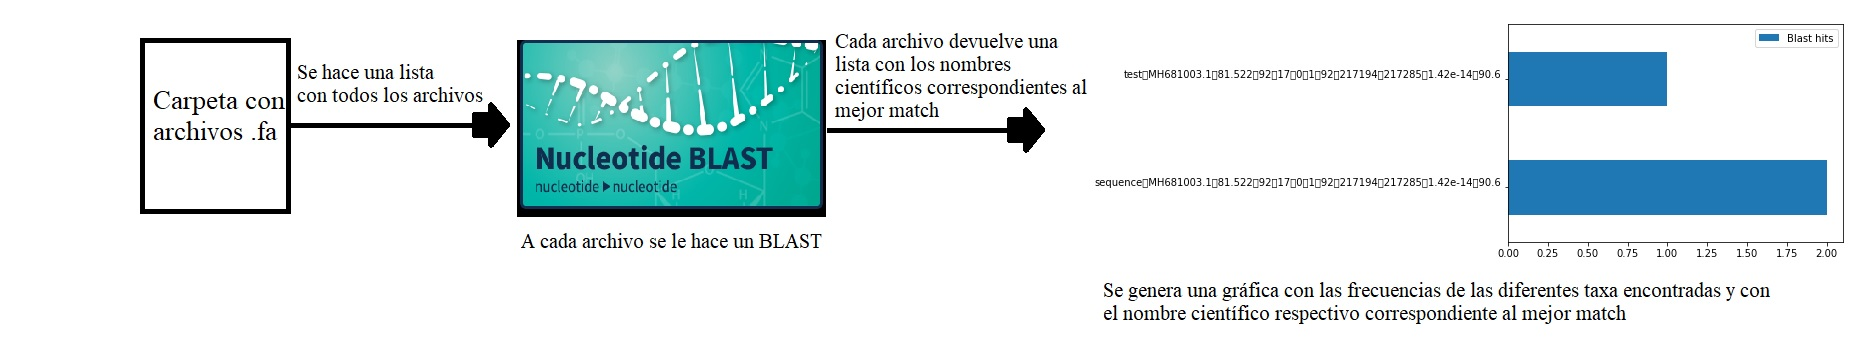



## Cómo usar el algoritmo


Únicamente se debe reemplazar la dirección que corresponde al archivo base en la variable "work_dir", esta dirección no debe tener nada más que carpetas, ya que no reconoce la presencia de archivos. El script requiere tener previamente instalado el ejecutable de BLAST, Python3 y la base de datos de nombres científicos taxdb.tar.gz. 
En este trabajo no se grafican adecuadamente los nombres científicos esperados debido a que el sistema operativo reconoce los archivos .fa como blocs de texto, en caso de usar un editor de texto como NotePad++ este error no debería ocurrir. 

# Algoritmo
   

test1\test2.txt.fa
test2\testotr.fa
test3\testotrwer.fa


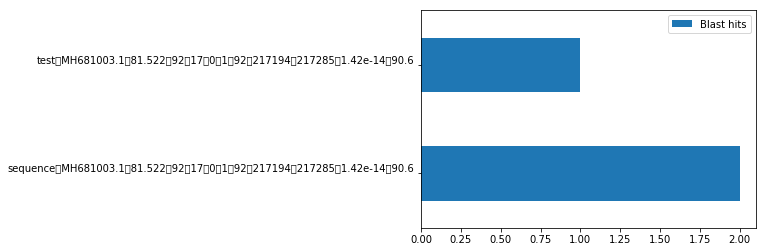

<Figure size 432x288 with 0 Axes>

In [9]:
# pyhton script for blast search
# 1 hace una lista de todas las carpetas en el directorio base
########################################################################################################################
###   EN EL DIRECTORIO BASE SOLO PUEDE HABER CARPETAS, NO SE ADMITE NINGUN ARCHIVO EN EL DIRECTORIO BASE ###############
########################################################################################################################
# 2 en cada directorio busca los archivos terminados en .fa (nucleótidos)
# 3 cada archivo .fa se corre con la herramienta de blast (nucleótidos) para linea de comandos
# 4 cada archivo .fa genera un archivo de salida con la lista de nombres cientificos correspondientes a las secuencias que mejor match hicieron con la nuestra
# 5 se crea una lista con el mejor nombre cientifo correspondiente al mejor hit de cada .fa
# 6 se crea una grafica de barras para vizualizar la frecuencia de ocurrencia de diferentes taxa
import matplotlib.pyplot as plt
import os
import subprocess
import time
import pandas
from collections import Counter
########################################################################################################################
########################################### CAMBIAR ####################################################################
work_dir=r"C:\TEST_MOISES"
########################################################################################################################
########################################################################################################################
name=[]
os.chdir(work_dir)
dirs=os.listdir()
for dir in dirs:
    os.chdir(dir)
    for file in os.listdir("."):
            if file.endswith(".fa"):
                print(os.path.join(str(dir), file))
                command = ["blastn", "-query", str(file), "-db" , "nt", "-outfmt", "6 sscinames", "-out", "str(file)+.out", "-task", "blastn", "-remote", "-max_target_seqs 10"]
                output,error  = subprocess.Popen(command, universal_newlines=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE).communicate()
                with open(str(file)+".out") as sci_name:
                    name.append(sci_name.readline())
    os.chdir(work_dir)
    time.sleep(30)

letter_counts = Counter(name)

df = pandas.DataFrame.from_dict(letter_counts, orient='index')
ax = df.plot.barh()
plt.tight_layout()
plt.legend(("Blast hits",))
plt.show()
plt.savefig('test.png')


## Conclusiones

Pese a la sencillez del script, este permite realizar rápidamente un reconocimiento de las secuencias de interés y graficar la frecuencia de los distintos taxa encontrados.

## Referencia

Altschul, S.F., Gish, W., Miller, W., Myers, E.W. & Lipman, D.J. (1990) "Basic local alignment search tool." J. Mol. Biol. 215:403-410. PubMed